In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf

C:\ProgramData\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
!pip install yfinance --user

In [2]:

# Defining the ticker symbol for Bitcoin
tickerSymbol = 'BTC-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for the ticker
btc_data = tickerData.history(period='1d', start='2014-09-17', end='2023-12-31', interval='1d')

# Print the first few rows of the data
btc_data.head()

#Save the data to a CSV file
btc_data.to_csv('BTC_Historical_Data.csv')


In [3]:
btc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00+00:00,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,0.0,0.0
2023-12-27 00:00:00+00:00,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,0.0,0.0
2023-12-28 00:00:00+00:00,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.0,0.0


In [4]:
btc_data.index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2023-12-21 00:00:00+00:00', '2023-12-22 00:00:00+00:00',
               '2023-12-23 00:00:00+00:00', '2023-12-24 00:00:00+00:00',
               '2023-12-25 00:00:00+00:00', '2023-12-26 00:00:00+00:00',
               '2023-12-27 00:00:00+00:00', '2023-12-28 00:00:00+00:00',
               '2023-12-29 00:00:00+00:00', '2023-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3392, freq=None)

In [5]:
btc_data = btc_data.asfreq('D')
btc_data.index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2023-12-21 00:00:00+00:00', '2023-12-22 00:00:00+00:00',
               '2023-12-23 00:00:00+00:00', '2023-12-24 00:00:00+00:00',
               '2023-12-25 00:00:00+00:00', '2023-12-26 00:00:00+00:00',
               '2023-12-27 00:00:00+00:00', '2023-12-28 00:00:00+00:00',
               '2023-12-29 00:00:00+00:00', '2023-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3392, freq='D')

In [6]:
# Check for missing values
missing_dates = btc_data[btc_data.isna().any(axis=1)]
print(missing_dates)

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []


In [7]:
btc_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00+00:00,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,0.0,0.0
2023-12-27 00:00:00+00:00,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,0.0,0.0
2023-12-28 00:00:00+00:00,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.0,0.0


In [8]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 00:00:00+00:00 to 2023-12-30 00:00:00+00:00
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3392 non-null   float64
 1   High          3392 non-null   float64
 2   Low           3392 non-null   float64
 3   Close         3392 non-null   float64
 4   Volume        3392 non-null   int64  
 5   Dividends     3392 non-null   float64
 6   Stock Splits  3392 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 212.0 KB


In [9]:
#Getting the statistics of som 
btc_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3392.000000,3392.000000,3392.000000,3392.000000,3.392000e+03,3392.0,3392.0
mean,14563.945437,14904.519086,14197.148352,14574.914414,1.654903e+10,0.0,0.0
std,16182.363674,16570.758411,15746.886508,16184.518031,1.908743e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,910.350998,923.463760,896.557251,915.989243,1.554558e+08,0.0,0.0
50%,8237.044922,8394.890137,8034.995117,8244.671875,1.146727e+10,0.0,0.0
75%,23743.839844,24205.182129,23243.770508,23776.682129,2.686730e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [10]:
#Checking for missing values in all of the columns
btc_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
#Checking the data type of all columns

btc_data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

# Data Exploration

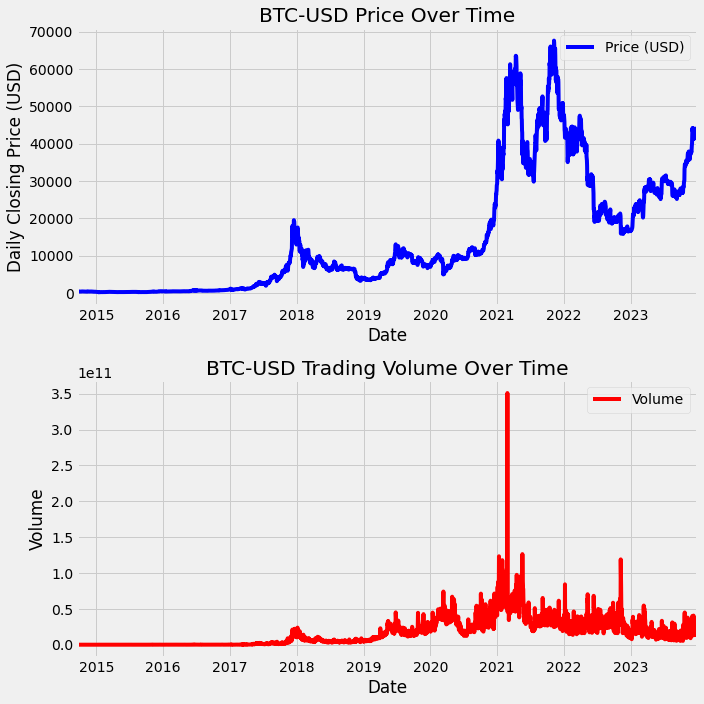

In [12]:

# Set the style
plt.style.use('fivethirtyeight')

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot BTC-USD Price Over Time
btc_data['Close'].plot(ax=ax[0], color='blue', label='Price (USD)')
ax[0].set_title('BTC-USD Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Daily Closing Price (USD)')
ax[0].legend()  # Add a legend

# Plot BTC-USD Trading Volume Over Time
btc_data['Volume'].plot(ax=ax[1], color='red', label='Volume')
ax[1].set_title('BTC-USD Trading Volume Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[1].legend()  # Add a legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

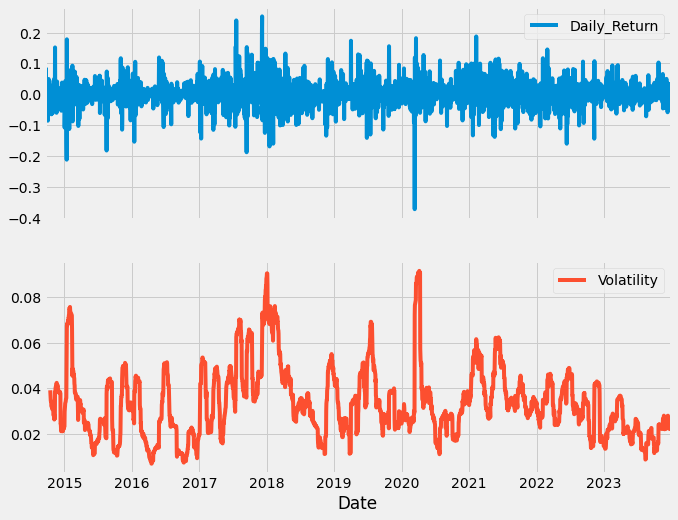

In [13]:
btc_data['Daily_Return'] = btc_data['Close'].pct_change()
btc_data['Volatility'] = btc_data['Daily_Return'].rolling(window=30).std()
btc_data[['Daily_Return', 'Volatility']].plot(subplots=True, figsize=(10, 8))


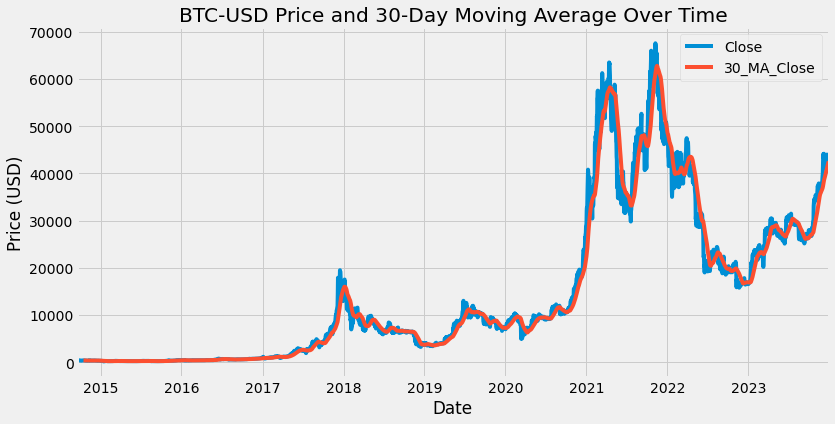

In [14]:
# Calculate the 30-day moving average of the closing price
btc_data['30_MA_Close'] = btc_data['Close'].rolling(window=30).mean()

# Plotting
btc_data[['Close', '30_MA_Close']].plot(figsize=(12, 6))  # Plot both the closing price and the moving average
plt.title('BTC-USD Price and 30-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


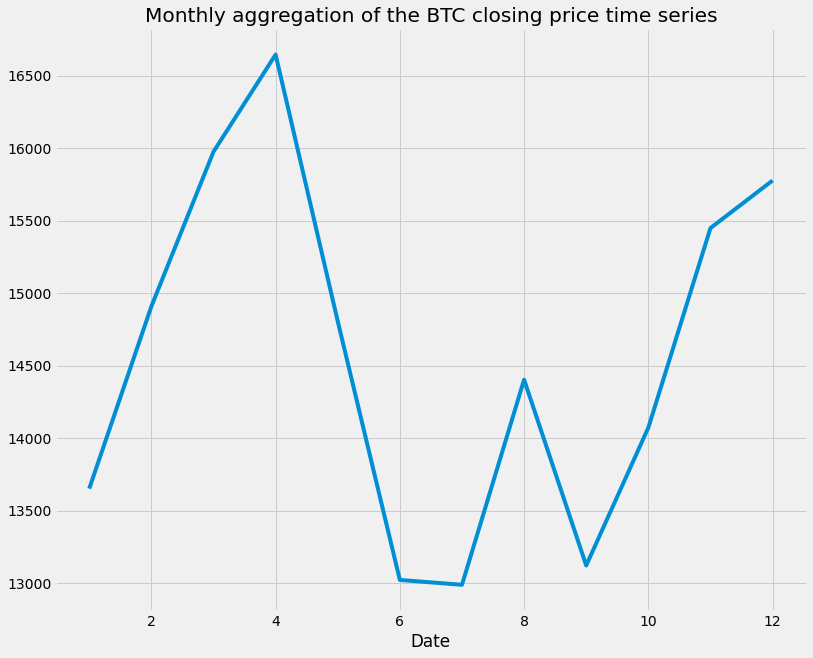

In [15]:
#This plot shows the monthly aggregation of BTC's closing price

index_month = btc_data.index.month
closing_price_by_month = btc_data['Close'].groupby(index_month).mean()
closing_price_by_month.plot(figsize=(12,10))
plt.title('Monthly aggregation of the BTC closing price time series')
plt.show()

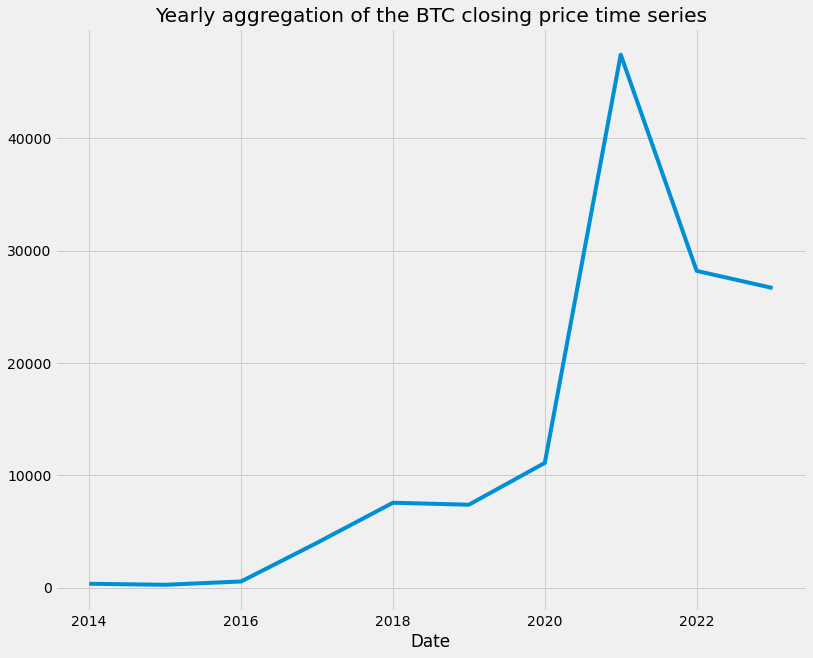

In [64]:
#This plot shows the monthly aggregation of BTC's closing price

index_year = btc_data.index.year
closing_price_by_year = btc_data['Close'].groupby(index_year).mean()
closing_price_by_year.plot(figsize=(12,10))
plt.title('Yearly aggregation of the BTC closing price time series')
plt.show()

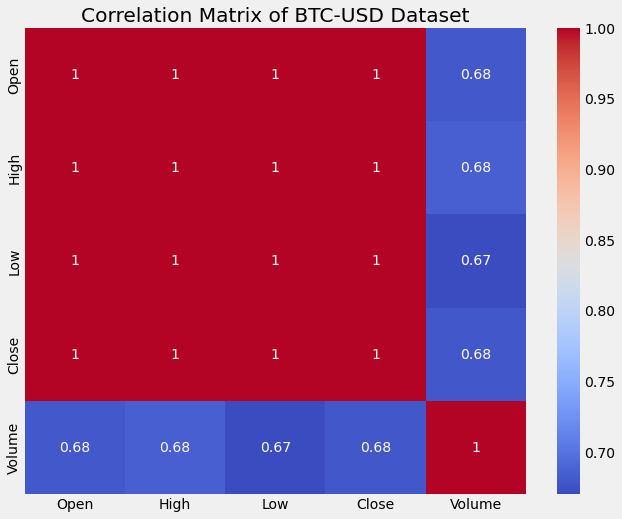

In [14]:
#Getting the correlation of the BTC price data
columns_of_interest = ['Open', 'High', 'Low', 'Close', 'Volume']
selected_btc_data = btc_data[columns_of_interest]
correlation_matrix = selected_btc_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of BTC-USD Dataset')
plt.show()

# Checking Outliers

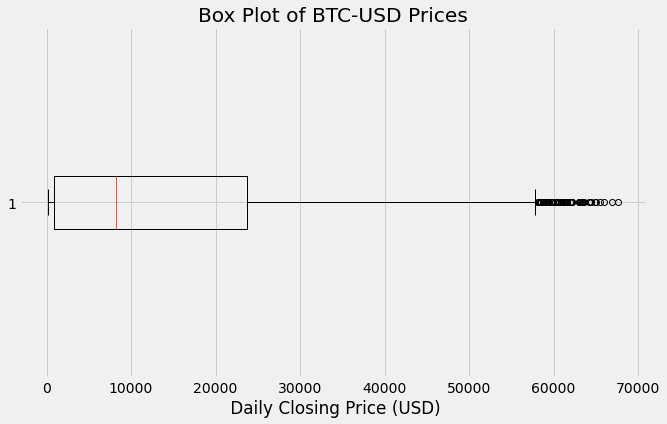

In [16]:
#The boxplot of the btc data

plt.figure(figsize=(10, 6))
plt.boxplot(btc_data['Close'], vert=False)
plt.title('Box Plot of BTC-USD Prices')
plt.xlabel(' Daily Closing Price (USD)')
plt.show()


# Testing For Stationarity

Using the ADF test, it is clear that the closing price of the BTC time series data is not stationary
The test statistics of both tests are greater than the critical values at 5% and their p-values are also greater than 0.05. Hence, the closing price needs to be stationarized.

In [14]:
#Creating a function to check for stationarity using the ADF test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(btc_data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.312319
p-value                           0.623518
#Lags Used                       29.000000
Number of Observations Used    3362.000000
Critical Value (1%)              -3.432297
Critical Value (5%)              -2.862400
Critical Value (10%)             -2.567228
dtype: float64


In [15]:
result = adfuller(btc_data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.312319
p-value: 0.623518


# Making the closing price stationary

Using first-order differencing, log transformation, and combination of both to achieve stationarity

For the first-order differencing, the test statistic is less than the critical value at 5%, the p-value is also less than 0.05. Thus, it is stationary
This is also true for the log-difference transformation. While they both are stationary, the log-difference transformation is more stationary than the first-order differencing transformation.

For the log transformation, the test statistic is greater than the critical value at 5% and the p-value is greater than 0.05, meaning this approach doesn't make the data stationary

In [16]:
btc_data['Price_diff'] = btc_data['Close'].diff()
btc_data.dropna(subset=['Price_diff'], inplace=True)

In [17]:
adf_test(btc_data['Price_diff'])

Results of Dickey-Fuller Test:
Test Statistic                -9.735304e+00
p-value                        8.782622e-17
#Lags Used                     2.800000e+01
Number of Observations Used    3.362000e+03
Critical Value (1%)           -3.432297e+00
Critical Value (5%)           -2.862400e+00
Critical Value (10%)          -2.567228e+00
dtype: float64


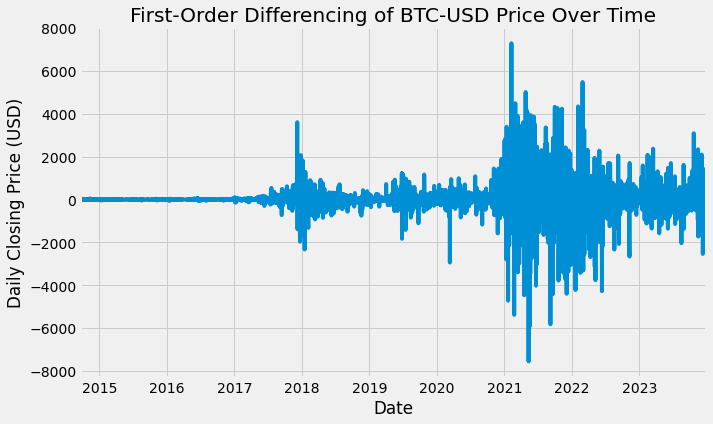

In [18]:
#Plotting a visualization of the first-order differenced close price to check for stationarity

btc_data['Price_diff'].plot(figsize=(10, 6))
plt.title('First-Order Differencing of BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price (USD)')
plt.show()

In [19]:
#Stationarizing the data using Log transformation
btc_data['Price_log'] = np.log(btc_data['Close'])
btc_data.dropna(subset=['Price_log'], inplace=True)

In [20]:
adf_test(btc_data['Price_log'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.889592
p-value                           0.791381
#Lags Used                        0.000000
Number of Observations Used    3390.000000
Critical Value (1%)              -3.432280
Critical Value (5%)              -2.862393
Critical Value (10%)             -2.567224
dtype: float64


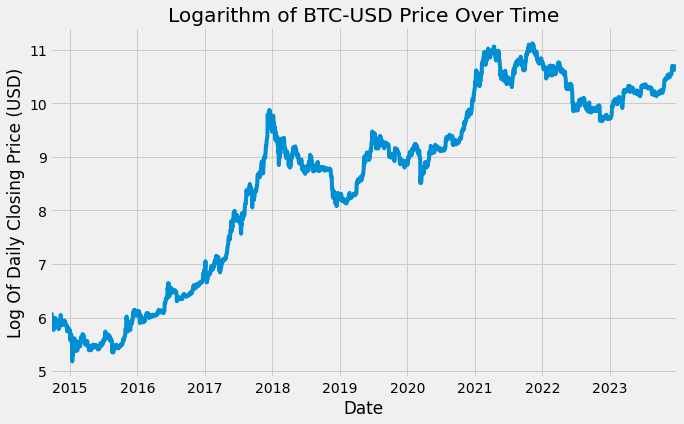

In [21]:
#Plotting a visualization of the log transformed close price to check for stationarity
btc_data['Price_log'].plot(figsize=(10, 6))
plt.title('Logarithm of BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Of Daily Closing Price (USD)')
plt.show()

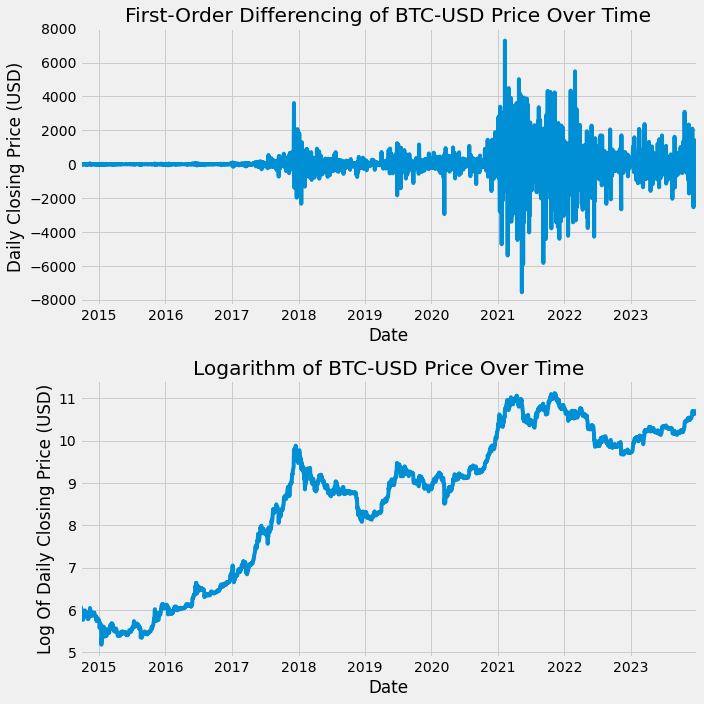

In [22]:
# Create a figure and set its size
plt.figure(figsize=(10, 10))

# First subplot for First-Order Differencing
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
btc_data['Price_diff'].plot()
plt.title('First-Order Differencing of BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price (USD)')

# Second subplot for Logarithm of Price
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
btc_data['Price_log'].plot()
plt.title('Logarithm of BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Of Daily Closing Price (USD)')

# Display the subplots
plt.tight_layout()  # Adjusts the plots to prevent overlapping
plt.show()


In [23]:
#Stationarizing the data using Log transformation and first-order differencing
btc_data['Price_log_diff'] = btc_data['Price_log'].diff()
btc_data.dropna(subset=['Price_log_diff'], inplace=True)

In [24]:
adf_test(btc_data['Price_log_diff'])

Results of Dickey-Fuller Test:
Test Statistic                -1.767267e+01
p-value                        3.638689e-30
#Lags Used                     9.000000e+00
Number of Observations Used    3.380000e+03
Critical Value (1%)           -3.432286e+00
Critical Value (5%)           -2.862395e+00
Critical Value (10%)          -2.567225e+00
dtype: float64


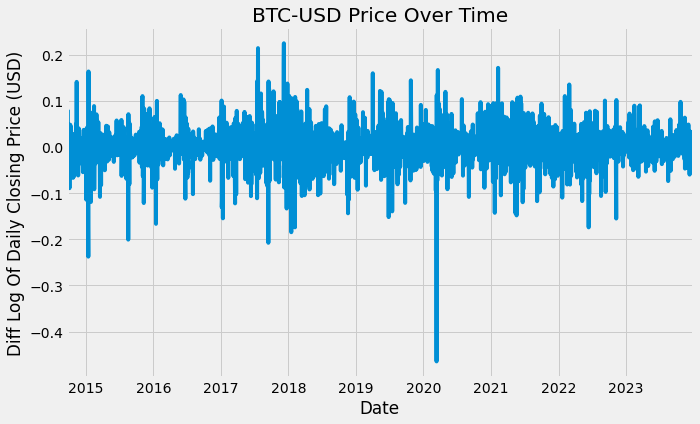

In [25]:
#Plotting a visualization of the differenced log transformed close price to check for stationarity
btc_data['Price_log_diff'].plot(figsize=(10, 6))
plt.title('BTC-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Diff Log Of Daily Closing Price (USD)')
plt.show()

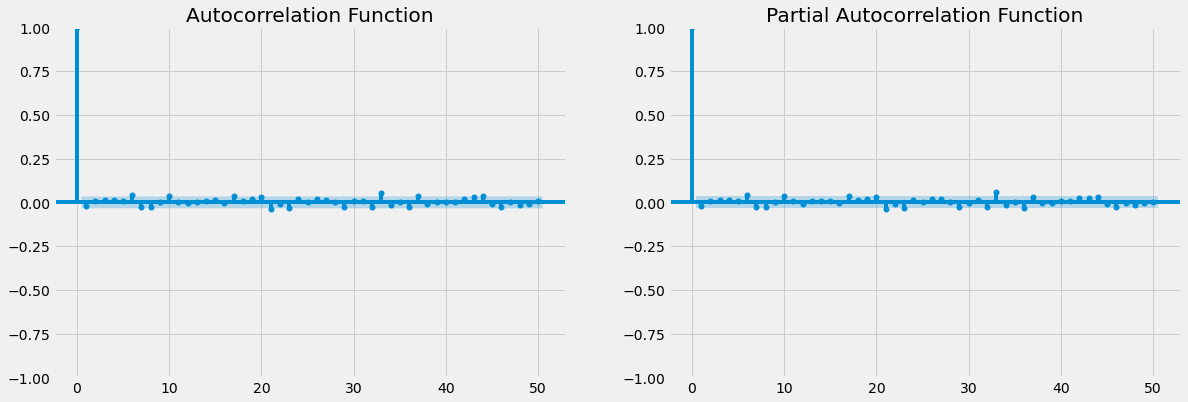

In [25]:

# Create a figure and define the subplots layout
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot ACF on the first subplot
plot_acf(btc_data['Price_log_diff'], lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation Function')

# Plot PACF on the second subplot
plot_pacf(btc_data['Price_log_diff'], lags=50, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function')

# Display the plots
plt.show()


In [26]:
#Splitting the stationarized closing price into train and test data while also preserving temporal order

split_point = int(len(btc_data['Price_log_diff']) * 0.8)
train_data_time_series = btc_data['Price_log_diff'][:split_point]
test_data_time_series = btc_data['Price_log_diff'][split_point:]


# ARIMA

In [27]:
from pmdarima import auto_arima

import pmdarima as pm
from pmdarima import auto_arima

# Assuming you have your time series data in 'time_series_data'

# Using auto_arima to find the best ARIMA model parameters (non-seasonal)
autoarima_model = auto_arima(train_data_time_series, 
                             start_p=0, start_q=0,
                             max_p=5, max_q=5,
                             seasonal=False,  # Indicating non-seasonal model
                             d=None, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

# Print the summary of the auto_arima model
print(autoarima_model.summary())

# The best model's parameters
print("Best model's (p, d, q):", autoarima_model.order)



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9874.356, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9873.281, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9873.271, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9871.288, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9877.239, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9876.363, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9876.356, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9874.340, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.702 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2712
Model:                        SARIMAX   Log Likelihood                4940.620
Date:                Tue, 23 Jan 2024   AIC                          -9877.239
Time:                       

In [105]:
!pip install --upgrade statsmodels --user


In [36]:
p = 0
q = 0
d = 0
# Fit the ARIMA model


# Fit the ARIMA model
arima_model = ARIMA(train_data_time_series, order=(p, d, q))
arima_results = arima_model.fit()



In [37]:
arima_forecast = arima_results.forecast(steps=len(test_data_time_series))


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test_data_time_series, arima_forecast)
mse = mean_squared_error(test_data_time_series, arima_forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.018853431176938003
Mean Squared Error: 0.0008135343971079741
Root Mean Squared Error: 0.028522524381757904


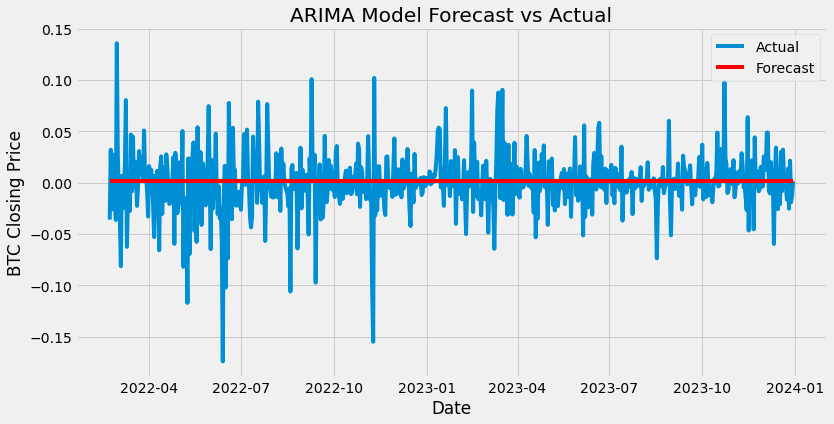

In [39]:

plt.figure(figsize=(12, 6))
plt.plot(test_data_time_series, label='Actual')
plt.plot(arima_forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.legend()
plt.show()

In [40]:

# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff_test = np.r_[last_log_value, test_data_time_series].cumsum()

# Reverse the log transformation
rev_log_test = np.exp(rev_diff_test)


In [41]:
# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff = np.r_[last_log_value, arima_forecast].cumsum()

# Reverse the log transformation
rev_log = np.exp(rev_diff)


In [44]:
last_log_value = np.log(btc_data['Close']).iloc[-1]
predicted_log = last_log_value + np.cumsum(arima_forecast)

# Reverse Log Transformation
predicted_original = np.exp(predicted_log)

In [47]:
test_data_time_series

Date
2022-02-21 00:00:00+00:00   -0.035924
2022-02-22 00:00:00+00:00    0.032135
2022-02-23 00:00:00+00:00   -0.026184
2022-02-24 00:00:00+00:00    0.027400
2022-02-25 00:00:00+00:00    0.022738
                               ...   
2023-12-26 00:00:00+00:00   -0.025374
2023-12-27 00:00:00+00:00    0.021462
2023-12-28 00:00:00+00:00   -0.018938
2023-12-29 00:00:00+00:00   -0.012474
2023-12-30 00:00:00+00:00    0.001365
Freq: D, Name: Price_log_diff, Length: 678, dtype: float64

In [46]:
arima_forecast

2022-02-21 00:00:00+00:00    0.001656
2022-02-22 00:00:00+00:00    0.001656
2022-02-23 00:00:00+00:00    0.001656
2022-02-24 00:00:00+00:00    0.001656
2022-02-25 00:00:00+00:00    0.001656
                               ...   
2023-12-26 00:00:00+00:00    0.001656
2023-12-27 00:00:00+00:00    0.001656
2023-12-28 00:00:00+00:00    0.001656
2023-12-29 00:00:00+00:00    0.001656
2023-12-30 00:00:00+00:00    0.001656
Freq: D, Name: predicted_mean, Length: 678, dtype: float64

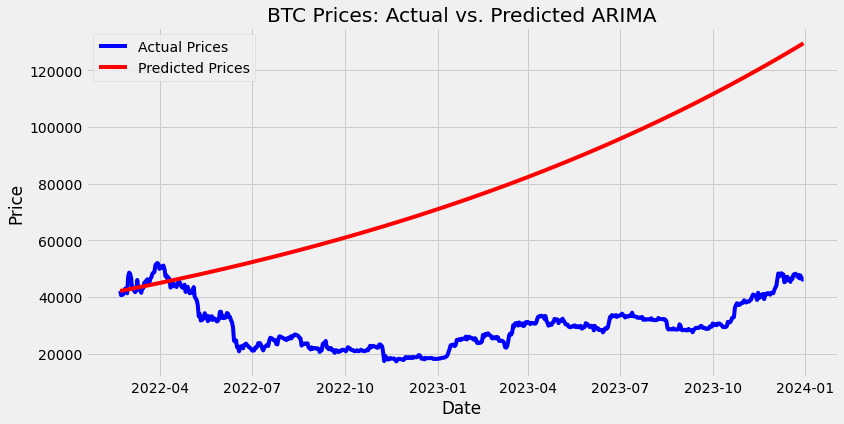

In [42]:
actual_values = btc_data['Close'][-len(rev_log):]  # Adjust this to match the length of your predictions

plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, rev_log_test, label='Actual Prices', color='blue')
plt.plot(actual_values.index, rev_log, label='Predicted Prices', color='red')
plt.title('BTC Prices: Actual vs. Predicted ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Second ARIMA model

In [43]:
p = 0
q = 0
d = 1
# Fit the ARIMA model


# Fit the ARIMA model
arima_model2 = ARIMA(train_data_time_series, order=(p, d, q))
arima_results2 = arima_model2.fit()

In [44]:
arima_forecast2 = arima_results2.forecast(steps=len(test_data_time_series))

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae2 = mean_absolute_error(test_data_time_series, arima_forecast2)
mse2 = mean_squared_error(test_data_time_series, arima_forecast2)
rmse2 = np.sqrt(mse)

print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Error: {mse2}")
print(f"Root Mean Squared Error: {rmse2}")

Mean Absolute Error: 0.04605286620878177
Mean Squared Error: 0.00267667683089069
Root Mean Squared Error: 0.028522524381757904


In [46]:
# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff_test = np.r_[last_log_value, test_data_time_series].cumsum()

# Reverse the log transformation
rev_log_test = np.exp(rev_diff_test)

In [47]:
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff2 = np.r_[last_log_value, arima_forecast2].cumsum()

# Reverse the log transformation
rev_log2 = np.exp(rev_diff2)

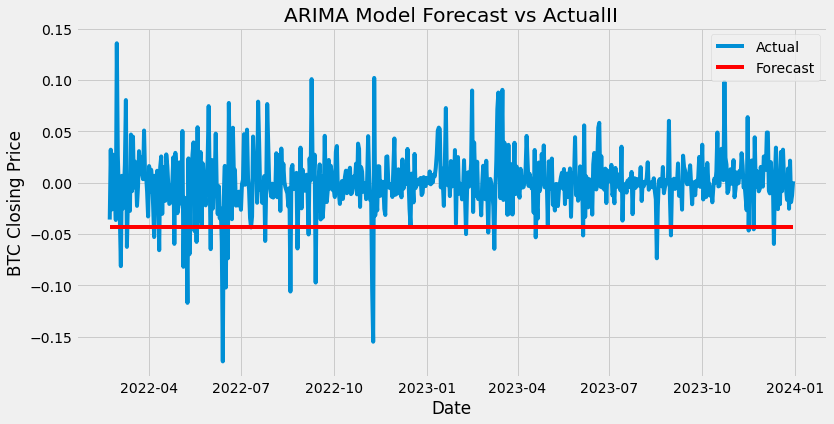

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_time_series, label='Actual')
plt.plot(arima_forecast2, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs ActualII')
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.legend()
plt.show()

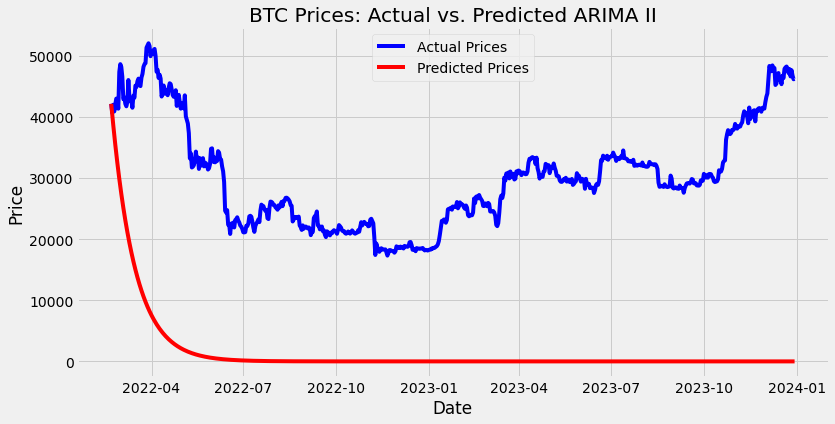

In [69]:
actual_values = btc_data['Close'][-len(rev_log):]  # Adjust this to match the length of your predictions

plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, rev_log_test, label='Actual Prices', color='blue')
plt.plot(actual_values.index, rev_log2, label='Predicted Prices', color='red')
plt.title('BTC Prices: Actual vs. Predicted ARIMA II')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
!pip install pmdarima --user

# First SARIMA Model

In [49]:
#Getting SARIMA parameters using Auto_arima
from pmdarima import auto_arima

autoarima_model = auto_arima(train_data_time_series, 
                             start_p=0, start_q=0,
                             max_p=3, max_q=3, m=7,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-5929.690, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-7637.873, Time=1.02 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.48 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-6774.728, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-7905.380, Time=0.99 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=4.65 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=-7066.895, Time=0.59 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=-8227.194, Time=2.52 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=-7940.612, Time=0.74 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=4.24 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=2.58 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=-8399.386, Time=1.77 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=-8116.393, Ti

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
p = 3
d = 1
q = 0
m = 7
P = 2
D = 1
Q = 0

model = SARIMAX(train_data_time_series, 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                    Price_log_diff   No. Observations:                 2712
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 7)   Log Likelihood                4178.979
Date:                           Tue, 23 Jan 2024   AIC                          -8345.958
Time:                                   02:40:11   BIC                          -8310.581
Sample:                               09-19-2014   HQIC                         -8333.162
                                    - 02-20-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7746      0.013    -61.370      0.000      -0.799      -0.750
ar.L2         -0.5087      0.015    -32.857

In [53]:
sarima_forecast = results.forecast(steps=len(test_data_time_series))

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Squared Error
mse3 = mean_squared_error(test_data_time_series, sarima_forecast)
print(f'MSE: {mse3}')

# Mean Absolute Error
mae3 = mean_absolute_error(test_data_time_series, sarima_forecast)
print(f'MAE: {mae3}')

# Root Mean Squared Error
rmse = np.sqrt(mse3)
print(f'RMSE: {rmse}')



MSE: 1.1293379166346165
MAE: 0.9255400191832931
RMSE: 1.062703117824831


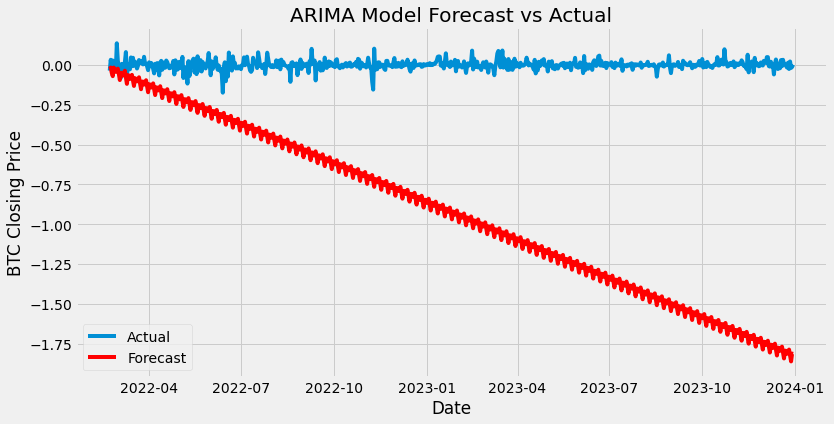

In [55]:

plt.figure(figsize=(12, 6))
plt.plot(test_data_time_series, label='Actual')
plt.plot(sarima_forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.legend()
plt.show()


In [56]:


# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff3 = np.r_[last_log_value, sarima_forecast].cumsum()

# Reverse the log transformation
rev_log3 = np.exp(rev_diff3)


In [57]:
# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff_test = np.r_[last_log_value, test_data_time_series].cumsum()

# Reverse the log transformation
rev_log_test = np.exp(rev_diff_test)

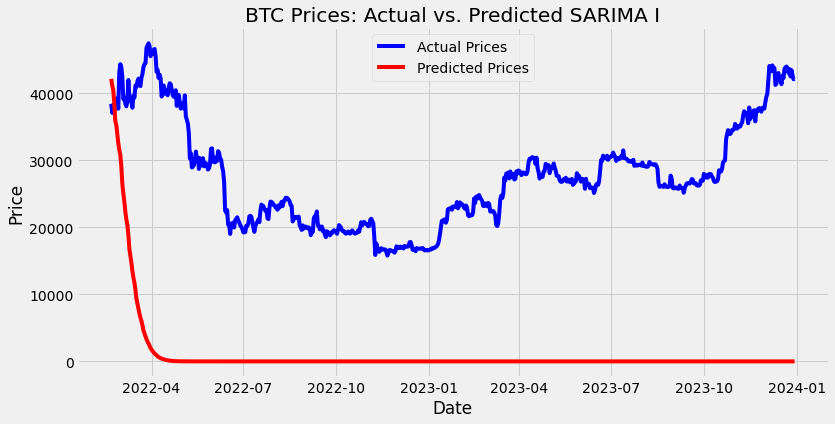

In [59]:


# Assuming you have the actual values for the same period as your predictions
actual_values = btc_data['Close'][-len(rev_log2):]  # Adjust this to match the length of your predictions

plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values, label='Actual Prices', color='blue')
plt.plot(actual_values.index, rev_log3, label='Predicted Prices', color='red')
plt.title('BTC Prices: Actual vs. Predicted SARIMA I')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Second SARIMA Model

In [61]:
p = 0
d = 0
q = 0
m = 7
P = 2
D = 1
Q = 0

model2 = SARIMAX(train_data_time_series, 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False,
                enforce_invertibility=False)

results2 = model2.fit()
print(results2.summary())

                                SARIMAX Results                                
Dep. Variable:          Price_log_diff   No. Observations:                 2712
Model:             SARIMAX(2, 1, 0, 7)   Log Likelihood                4493.010
Date:                 Tue, 23 Jan 2024   AIC                          -8980.020
Time:                         02:49:20   BIC                          -8962.327
Sample:                     09-19-2014   HQIC                         -8973.621
                          - 02-20-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6841      0.010    -67.326      0.000      -0.704      -0.664
ar.S.L14      -0.3124      0.012    -25.188      0.000      -0.337      -0.288
sigma2         0.0021    2.6e-05     79.873 

In [62]:
sarima_forecast2 = results2.forecast(steps=len(test_data_time_series))

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Squared Error
mse4 = mean_squared_error(test_data_time_series, sarima_forecast2)
print(f'MSE: {mse4}')

# Mean Absolute Error
mae4 = mean_absolute_error(test_data_time_series, sarima_forecast2)
print(f'MAE: {mae4}')

# Root Mean Squared Error
rmse4 = np.sqrt(mse4)
print(f'RMSE: {rmse4}')


MSE: 0.0012808902847374667
MAE: 0.025931907808929313
RMSE: 0.03578952758472046


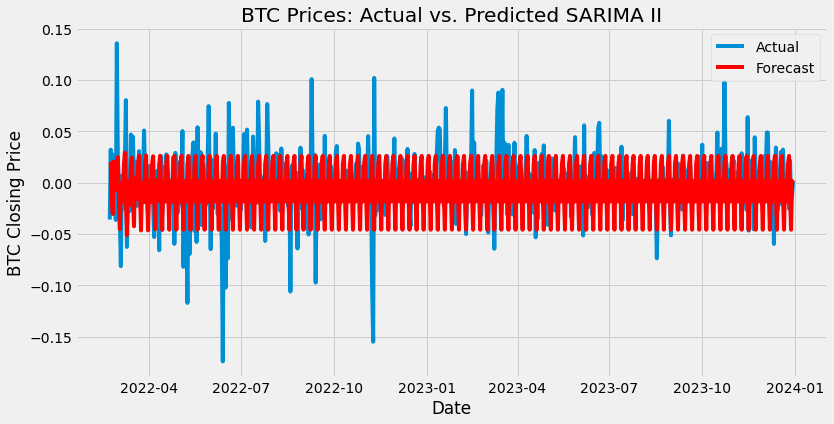

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_time_series, label='Actual')
plt.plot(sarima_forecast2, label='Forecast', color='red')
plt.title('BTC Prices: Actual vs. Predicted SARIMA II')
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.legend()
plt.show()

In [65]:
# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff4 = np.r_[last_log_value, sarima_forecast2].cumsum()

# Reverse the log transformation
rev_log4 = np.exp(rev_diff4)

In [66]:
# Assuming btc_data['Close'] is your original data and btc_data_log_diff is the differenced log data
last_log_value = np.log(btc_data['Close']).iloc[-1]

# Reverse the differencing
rev_diff_test = np.r_[last_log_value, test_data_time_series].cumsum()

# Reverse the log transformation
rev_log_test = np.exp(rev_diff_test)

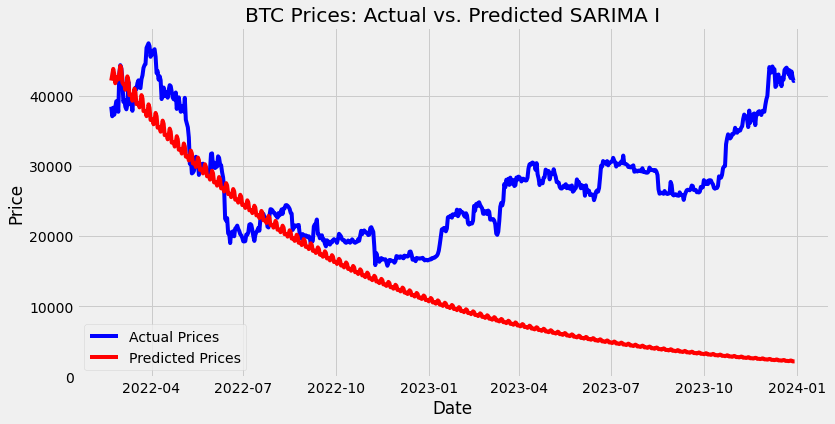

In [67]:
actual_values = btc_data['Close'][-len(rev_log2):]  # Adjust this to match the length of your predictions

plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values, label='Actual Prices', color='blue')
plt.plot(actual_values.index, rev_log4, label='Predicted Prices', color='red')
plt.title('BTC Prices: Actual vs. Predicted SARIMA II')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# LSTM

Scaling the data using normalisation

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
#Scaling the data using the Normalisation method

scaler = MinMaxScaler(feature_range=(0, 1))
btc_data_scaled = scaler.fit_transform(btc_data['Close'].values.reshape(-1,1))

In [72]:
print("First few elements of scaled data:")
print(btc_data_scaled[:5])  # Print the first 5 elements of X


First few elements of scaled data:
[[0.00321557]
 [0.00342492]
 [0.0032753 ]
 [0.00332473]
 [0.0038239 ]]


In [73]:
#Creating a supervised learning

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Assuming the close price is the target
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(btc_data_scaled, look_back)


In [74]:


# Print the first few elements of X and Y
print("First few elements in X:")
print(X[:5])  # Print the first 5 elements of X

print("\nFirst few elements in Y:")
print(Y[:5])  # Print the first 5 elements of Y

# Check and print the shape of X and Y
print("\nShape of X:", X.shape)
print("Shape of Y:", Y.shape)


First few elements in X:
[[[0.00321557]]

 [[0.00342492]]

 [[0.0032753 ]]

 [[0.00332473]]

 [[0.0038239 ]]]

First few elements in Y:
[0.00342492 0.0032753  0.00332473 0.0038239  0.00363714]

Shape of X: (3388, 1, 1)
Shape of Y: (3388,)


In [75]:
#Splitting the data into train and test datasets

split_percent = 0.80
split = int(split_percent * len(X))

X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]


In [76]:
# Print the first few reshaped samples from X_train and X_test
print("First few samples in X_train:")
print(X_train[:5])  # Print the first 5 samples of X_train

print("\nFirst few samples in X_test:")
print(X_test[:5])  # Print the first 5 samples of X_test

print("First few samples in X_train:")
print(Y_train[:5])  # Print the first 5 samples of X_train

print("\nFirst few samples in X_test:")
print(Y_test[:5])  # Print the first 5 samples of X_test


First few samples in X_train:
[[[0.00321557]]

 [[0.00342492]]

 [[0.0032753 ]]

 [[0.00332473]]

 [[0.0038239 ]]]

First few samples in X_test:
[[[0.5927409 ]]

 [[0.56765098]]

 [[0.54752747]]

 [[0.56549407]]

 [[0.55081124]]]
First few samples in X_train:
[0.00342492 0.0032753  0.00332473 0.0038239  0.00363714]

First few samples in X_test:
[0.56765098 0.54752747 0.56549407 0.55081124 0.56618531]


In [77]:
X_train_shaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_shaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [78]:
# Print the first few reshaped samples from X_train and X_test
print("First few reshaped samples in X_train:")
print(X_train_shaped[:5])  # Print the first 5 samples of X_train

print("\nFirst few reshaped samples in X_test:")
print(X_test_shaped[:5])  # Print the first 5 samples of X_test

# Print the new shape of X_train and X_test
print("\nNew shape of X_train:", X_train_shaped.shape)
print("New shape of X_test:", X_test_shaped.shape)


First few reshaped samples in X_train:
[[[0.00321557]]

 [[0.00342492]]

 [[0.0032753 ]]

 [[0.00332473]]

 [[0.0038239 ]]]

First few reshaped samples in X_test:
[[[0.5927409 ]]

 [[0.56765098]]

 [[0.54752747]]

 [[0.56549407]]

 [[0.55081124]]]

New shape of X_train: (2710, 1, 1)
New shape of X_test: (678, 1, 1)


# First LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
#Hyperparameter tuning for optimisation, adding and reducing layers, adding drop out, increasing and decreasing learning rate

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mean_squared_error')

In [156]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100

85/85 [==============================] - 3s 2ms/step - loss: 0.0237
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 2.5120e-04
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 2.0981e-04
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 1.8641e-04
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 1.7227e-04
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 1.6194e-04
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 1.5774e-04
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 1.4999e-04
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 1.5759e-04
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 1.4349e-04
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 1.3863e-04
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 1.4

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, Y_train, epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/1000

68/68 [==============================] - 5s 16ms/step - loss: 0.0034 - val_loss: 0.0727
Epoch 2/1000
68/68 [==============================] - 0s 4ms/step - loss: 1.3169e-04 - val_loss: 7.0640e-04
Epoch 3/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.6820e-05 - val_loss: 6.6998e-04
Epoch 4/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.8201e-05 - val_loss: 6.5908e-04
Epoch 5/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.8326e-05 - val_loss: 6.0229e-04
Epoch 6/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.6041e-05 - val_loss: 6.3890e-04
Epoch 7/1000
68/68 [==============================] - 0s 4ms/step - loss: 5.6319e-05 - val_loss: 7.9617e-04
Epoch 8/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.9403e-05 - val_loss: 9.5473e-04
Epoch 9/1000
68/68 [==============================] - 0s 4ms/step - loss: 4.2037e-05 - val_loss: 5.9397e-04
Epoch 10/1000
68/68 [=============

In [81]:
predictions = model.predict(X_test)
predictions_inverse = scaler.inverse_transform(predictions)

22/22 [==============================] - 1s 1ms/step


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error
mse = mean_squared_error(Y_test, predictions_inverse)
print(f'MSE: {mse}')

# Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions_inverse)
print(f'MAE: {mae}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

MSE: 772663437.476457
MAE: 26851.19510500597
RMSE: 27796.82423365045


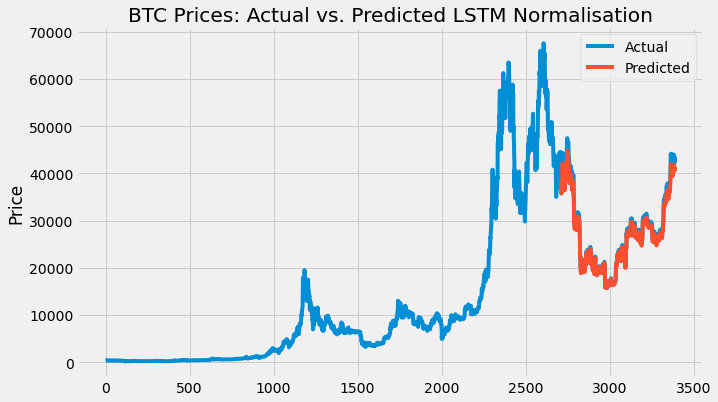

In [84]:
plt.figure(figsize=(10,6))
plt.plot(btc_data['Close'].values, label='Actual')
plt.plot(np.arange(len(Y_train), len(Y_train) + len(predictions_inverse)), predictions_inverse, label='Predicted')
plt.title('BTC Prices: Actual vs. Predicted LSTM Normalisation')
#plt.xlabel('Count')
plt.ylabel('Price')
plt.legend()

In [85]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler2 = StandardScaler()

# Fit and transform the data
btc_data_scaled2 = scaler2.fit_transform(btc_data['Close'].values.reshape(-1, 1))

In [86]:
X_standard, Y_standard = create_dataset(btc_data_scaled2, look_back)

In [87]:
split_percent = 0.80
split = int(split_percent * len(X))

X_train_standard = X_standard[:split]
Y_train_standard = Y_standard[:split]
X_test_standard = X_standard[split:]
Y_test_standard = Y_standard[split:]

In [88]:
X_train_standard = X_train_standard.reshape(X_train_standard.shape[0], X_train_standard.shape[1], 1)
X_test_standard = X_test_standard.reshape(X_test_standard.shape[0], X_test_standard.shape[1], 1)

In [96]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
#Hyperparameter tuning for optimisation, adding and reducing layers, adding drop out, increasing and decreasing learning rate

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mean_squared_error')

In [97]:
model.fit(X_train_standard, Y_train_standard, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
85/85 [==============================] - 3s 2ms/step - loss: 0.3734
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/100
85/85 [=================

In [91]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train_standard, Y_train_standard, epochs=1000, batch_size=32, verbose=1, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/1000
68/68 [==============================] - 5s 15ms/step - loss: 0.1498 - val_loss: 2.5507
Epoch 2/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 2.0921
Epoch 3/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 1.8080
Epoch 4/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 1.6671
Epoch 5/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 1.5020
Epoch 6/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 1.2983
Epoch 7/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 1.0938
Epoch 8/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.8914
Epoch 9/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.7006
Epoch 10/1000
68/68 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.525

In [92]:
predictions2 = model.predict(X_test_standard)
predictions_standard = scaler2.inverse_transform(predictions2)

22/22 [==============================] - 1s 1ms/step


In [93]:

# Mean Squared Error
mse = mean_squared_error(Y_test_standard, predictions_standard)
print(f'MSE: {mse}')

# Mean Absolute Error
mae = mean_absolute_error(Y_test_standard, predictions_standard)
print(f'MAE: {mae}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


MSE: 665226479.8863065
MAE: 25218.036899602976
RMSE: 25791.984799280308


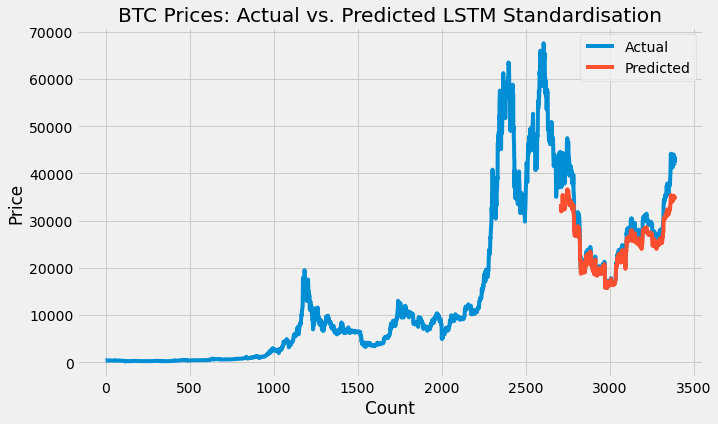

In [95]:
plt.figure(figsize=(10,6))
plt.plot(btc_data['Close'].values, label='Actual')
plt.plot(np.arange(len(Y_train_standard), len(Y_train_standard) + len(predictions_standard)), predictions_standard, label='Predicted')
plt.title('BTC Prices: Actual vs. Predicted LSTM Standardisation')
plt.xlabel('Count')
plt.ylabel('Price')
plt.legend()